In [10]:
#load packages and read file
import pandas as pd 
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df=pd.read_csv('teleco_market_basket.csv') 
pd.set_option('display.max_columns', None)
df.head()

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(15002, 20)

In [12]:
# Source (kmair, Market Basket Analysis 2019)
#Converting the data frame so the item is the header and whether the customer bought or didn't buy the item is shown as the values
records = []
for i in range (0, 15002):
    records.append([str(df.values[i,j]) for j in range(0, 20)])
 

In [13]:
# Source (kmair, Market Basket Analysis 2019)
#Transaction encoder changes the values to True if they bought it and false if they didn't 
T = TransactionEncoder()
fit = T.fit(records).transform(records)
df = pd.DataFrame(fit, columns = T.columns_)
df.head()

,10ft iPHone Charger Cable,10ft iPHone Charger Cable 2 Pack,3 pack Nylon Braided Lightning Cable,3A USB Type C Cable 3 pack 6FT,5pack Nylon Braided USB C cables,ARRIS SURFboard SB8200 Cable Modem,Anker 2-in-1 USB Card Reader,Anker 4-port USB hub,Anker USB C to HDMI Adapter,Apple Lightning to Digital AV Adapter,Apple Lightning to USB cable,Apple Magic Mouse 2,Apple Pencil,Apple Pencil 2nd Gen,Apple Power Adapter Extension Cable,Apple USB-C Charger cable,AutoFocus 1080p Webcam,BENGOO G90000 headset,Blue Light Blocking Glasses,Blue Light Blocking Glasses 2pack,Brother Genuine High Yield Toner Cartridge,Cat 6 Ethernet Cable 50ft,Cat8 Ethernet Cable,CicTsing MM057 2.4G Wireless Mouse,Cleaning Gel Universal Dust Cleaner,Creative Pebble 2.0 Speakers,DisplayPort ot HDMI adapter,Dust-Off Compressed Gas,Dust-Off Compressed Gas 2 pack,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses,Falcon Dust Off Compressed Gas,HOVAMP Mfi 6pack Lightning Cable,HOVAMP iPhone charger,HP 61 2 pack ink,HP 61 Tri-color ink,HP 61 ink,HP 62XL Tri-Color ink,HP 62XL ink,HP 63 Ink,HP 63 Tri-color ink,HP 63XL Ink,HP 63XL Tri-color ink,HP 64 Tri-Color ink,HP 64 ink,HP 65 ink,HP 902XL ink,HP 952 ink,HP ENVY 5055 printer,HP952XL ink,HooToo USB C Hub,HyperX Cloud Stinger Headset,Jelly Comb 2.4G Slim Wireless mouse,Leader Desk Pad Protector,Logitech M510 Wireless mouse,Logitech MK270 Wireless Keyboard/Mouse,Logitech MK345 Wireless combo,Logitech USB H390 headset,M.2 Screw kit,Mfi-Certified Lightning to USB A Cable,Micro Center 32GB Memory card,Microsot Surface Dock 2,Moread HDMI to VGA Adapter,Mpow HC6 USB Headset,NETGEAR CM500 Cable Modem,NETGEAR Nighthawk WiFi Router,NETGEAR Orbi Home Mesh WiFi System,Nylon Braided Lightning to USB cable,PS4 Headset,Premium Nylon USB Cable,RUNMUS Gaming Headset,SAMSUNG 128GB card,SAMSUNG 256 GB card,SAMSUNG EVO 32GB card,SAMSUNG EVO 64GB card,Sabrent 4-port USB 3.0 hub,SanDisk 128GB Ultra microSDXC card,SanDisk 128GB card,SanDisk 128GB microSDXC card,SanDisk 32GB Ultra SDHC card,SanDisk 32GB card,SanDisk Extreme 128GB card,SanDisk Extreme 256GB card,SanDisk Extreme 32GB 2pack card,SanDisk Extreme Pro 128GB card,SanDisk Extreme Pro 64GB card,SanDisk Ultra 128GB card,SanDisk Ultra 256GB card,SanDisk Ultra 400GB card,SanDisk Ultra 64GB card,Screen Mom Screen Cleaner kit,Stylus Pen for iPad,Syntech USB C to USB Adapter,TONOR USB Gaming Microphone,TP-Link AC1750 Smart WiFi Router,TP-Link AC4000 WiFi router,TopMate C5 Laptop Cooler pad,UNEN Mfi Certified 5-pack Lightning Cable,USB 2.0 Printer cable,USB C to USB Male Adapter,USB Type C Cable,USB Type C to USB-A Charger cable,VIVO Dual LCD Monitor Desk mount,VicTsing Mouse Pad,VicTsing Wireless mouse,Vsco 70 pack stickers,Webcam with Microphone,XPOWER A-2 Air Pump blower,YUNSONG 3pack 6ft Nylon Lightning Cable,hP 65 Tri-color ink,iFixit Pro Tech Toolkit,iPhone 11 case,iPhone 12 Charger cable,iPhone 12 Pro case,iPhone 12 case,iPhone Charger Cable Anker 6ft,iPhone SE case,nan,nonda USB C to USB Adapter,seenda Wireless mouse
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,False,True,False,False,False,False,False,True,False,Fals

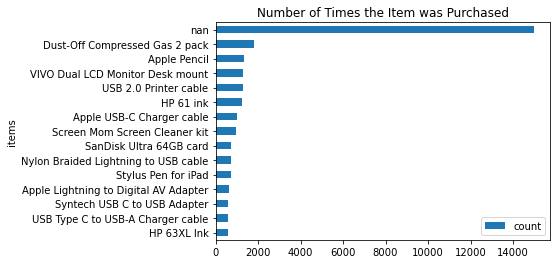

In [14]:
# Source (kmair, Market Basket Analysis 2019)
#reorder list of items in ascending order and include only the largest 15
count = df.loc[:,:].sum()
num = count.sort_values(0, ascending = False).head(15)
num = num.to_frame()
num = num.reset_index()
num = num.rename(columns = {'index': 'items',0: 'count'})


#Bar plot to show how often each item was bought and sorted in descending order 
B= num.plot.barh(x='items',y = 'count')
plt.title('Number of Times the Item was Purchased')
plt.gca().invert_yaxis()

In [15]:
#drop nan column
df = df.drop(['nan'], axis = 1)

In [16]:
#Printed cleaned dataset
df.to_csv('D212Task3Final.csv')

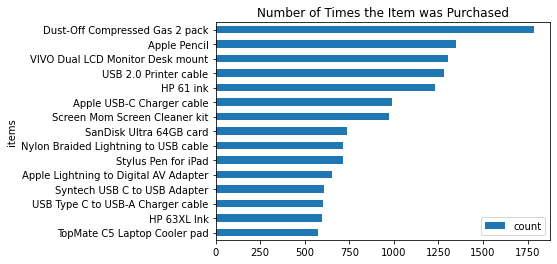

In [17]:
# Source (kmair, Market Basket Analysis 2019)
#Bar plot to show how often each item was bought and sorted in descending order after removing Nan
count = df.loc[:,:].sum()
num = count.sort_values(0, ascending = False).head(15)
num = num.to_frame()
num = num.reset_index()
num = num.rename(columns = {'index': 'items',0: 'count'})


#Bar plot to show how often each item was bought and sorted in descending order after removing nan
B= num.plot.barh(x='items',y = 'count')
plt.title('Number of Times the Item was Purchased')
plt.gca().invert_yaxis()

In [18]:
# Source (kmair, Market Basket Analysis 2019)
#Use Apriori to build the frequent items
A = apriori(df, min_support = 0.02, use_colnames = True)
A.head()

,support,itemsets
0,0.025263,(10ft iPHone Charger Cable 2 Pack)
1,0.021264,(3A USB Type C Cable 3 pack 6FT)
2,0.034195,(Anker USB C to HDMI Adapter)
3,0.043594,(Apple Lightning to Digital AV Adapter)
4,0.089855,(Apple Pencil)


In [19]:
# Source (kmair, Market Basket Analysis 2019)
#Use association rules to build the rules
AR = association_rules(A, metric = 'lift', min_threshold = 1)
AR

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple Pencil),(Dust-Off Compressed Gas 2 pack),0.089855,0.119184,0.025463,0.283383,2.377689,0.014754,1.229130
1,(Dust-Off Compressed Gas 2 pack),(Apple Pencil),0.119184,0.089855,0.025463,0.213647,2.377689,0.014754,1.157425
2,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.081922,0.119184,0.026330,0.321400,2.696664,0.016566,1.297989
3,(Dust-Off Compressed Gas 2 pack),(HP 61 ink),0.119184,0.081922,0.026330,0.220917,2.696664,0.016566,1.178408
4,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.049127,0.119184,0.020464,0.416554,3.495043,0.014609,1.509677
5,(Dust-Off Compressed Gas 2 pack),(SanDisk Ultra 64GB card),0.119184,0.049127,0.020464,0.171700,3.495043,0.014609,1.147982
6,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.064791,0.119184,0.023997,0.370370,3.107548,0.016275,1.398943
7,(Dust-Off Compressed Gas 2 pack),(Screen Mom Screen Cleaner kit),0.119184,0.064791,0.023997,0.201342,3.107548,0.016275,1.170976
8,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.087055,0.119184,0.029863,0.343032,2.878170,0.019487,1.340729
9,(Dust-Off Compressed Gas 2 pack),(VIVO Dual LCD Monitor Desk mount),0.119184,0.087055,0.029863,0.250559,2.878170,0.019487,1.218168


In [20]:
# source (Moffitt, Introduction to Market Basket Analysis in&nbsp;Python 2017)
#filter out the rules with the highest lift and highest confidence
R=AR[(AR['lift'] >= 2.5) & (AR['confidence'] >= 0.3)]
R

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(HP 61 ink),(Dust-Off Compressed Gas 2 pack),0.081922,0.119184,0.026330,0.321400,2.696664,0.016566,1.297989
4,(SanDisk Ultra 64GB card),(Dust-Off Compressed Gas 2 pack),0.049127,0.119184,0.020464,0.416554,3.495043,0.014609,1.509677
6,(Screen Mom Screen Cleaner kit),(Dust-Off Compressed Gas 2 pack),0.064791,0.119184,0.023997,0.370370,3.107548,0.016275,1.398943
8,(VIVO Dual LCD Monitor Desk mount),(Dust-Off Compressed Gas 2 pack),0.087055,0.119184,0.029863,0.343032,2.878170,0.019487,1.340729


Number of occurrences of the items found in with the most associations

In [21]:
df['HP 61 ink'].sum()

1229

In [22]:
df['Dust-Off Compressed Gas 2 pack'].sum()

1788

In [23]:
df['SanDisk Ultra 64GB card'].sum()

737

In [24]:
df['Screen Mom Screen Cleaner kit'].sum()

972

In [25]:
df['VIVO Dual LCD Monitor Desk mount'].sum()

1306